<!--HEADER-->
*Notas de aula de Modelagem Matemática - 2021/1 [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2021p1/notas_de_aula/03.03-Unidades_Julia.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/julia-env-for-binder-2021p1?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Frmsrosa%252Fmodelagem_matematica%26branch%3Dmodmat2021p1%26urlpath%3Dtree%252Fmodelagem_matematica%252Fnotas_de_aula/03.03-Unidades_Julia.ipynb" target="_blank"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open in binder"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2021p1/notas_de_aula/slides/03.03-Unidades_Julia.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="View Slides" title="View Slides"></a>&nbsp;

<!--NAVIGATOR-->
[<- 3.2. Análise dimensional e o Teorema de Buckingham-Pi](03.02-BuckinghamPi.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [4. Ajuste de parâmetros ->](04.00-Ajuste_parametros.ipynb)

---


# Trabalhando com unidades e dimensões em Julia

* [PainterQubits/Unitful.jl](https://github.com/PainterQubits/Unitful.jl): pacote para se trabalhar com quantidades, unidades e dimensões

* [jw3126/UnitfulRecipes.jl](https://github.com/jw3126/UnitfulRecipes.jl): pacote com "receitas"  para se traçar gráficos vai [JuliaPlots/Plots.jl]](https://github.com/JuliaPlots/Plots.jl).

* [rmsrosa/UnitfulBuckinghamPi.jl](https://github.com/rmsrosa/UnitfulBuckinghamPi.jl): pacote para se obter os grupos adimensionais garantidos pelo Teorema de Buckingham-Pi.

In [1]:
using Unitful
using UnitfulBuckinghamPi
using Plots
using UnitfulRecipes

## Quantidades, unidades e dimensão via Unitful.jl

* É bastante simple definir e operar com quantidades, unidades e dimensões através do pacote [PainterQubits/Unitful.jl](https://github.com/PainterQubits/Unitful.jl).

* Basta adicionarmos uma *strings prefixada com `u`*, com a unidade desejada na string. Por exemplo:

### Comprimento

In [2]:
h0 = 10.0u"m" # quantidade em metros

10.0 m

In [3]:
h0.val # valor da quantidade

10.0

In [4]:
unit(h0) # unidade da quantidade

m

In [5]:
dimension(h0) # dimensão da quantidade

𝐋

In [6]:
typeof(h0) # tipo

Quantity{Float64, 𝐋, Unitful.FreeUnits{(m,), 𝐋, nothing}}

In [7]:
uconvert(u"cm", h0) # convertendo para outras unidades (de mesma dimensão)

1000.0 cm

### Velocidade

In [8]:
v0 = 3u"m/s"

3 m s⁻¹

In [9]:
deslocamento = 198u"km"; tempo = 1.8u"hr"; velocidade = deslocamento / tempo

110.0 km hr⁻¹

### Aceleração

In [10]:
g = -9.8u"m/s^2"

-9.8 m s⁻²

### Altura de um corpo em queda livre

In [11]:
h(t, h0, v0) = h0 + v0 * t + g * t^2/2

h (generic function with 1 method)

In [12]:
t = (0:0.02:2.0)u"s" # iterador com unidade

(0.0:0.02:2.0) s

In [13]:
h.(t, h0, v0)

101-element Vector{Quantity{Float64, 𝐋, Unitful.FreeUnits{(m,), 𝐋, nothing}}}:
                 10.0 m
             10.05804 m
             10.11216 m
             10.16236 m
             10.20864 m
   10.251000000000001 m
   10.289439999999999 m
             10.32396 m
   10.354560000000001 m
   10.381239999999998 m
               10.404 m
             10.42284 m
             10.43776 m
                      ⋮
 -0.18516000000000155 m
 -0.47600000000000264 m
  -0.7707600000000028 m
  -1.0694400000000037 m
  -1.3720400000000037 m
   -1.678560000000001 m
  -1.9890000000000008 m
  -2.3033599999999996 m
  -2.6216399999999993 m
  -2.9438400000000016 m
   -3.269960000000003 m
  -3.6000000000000014 m

### Traçando o gráfico da função sobre o intervalo dado

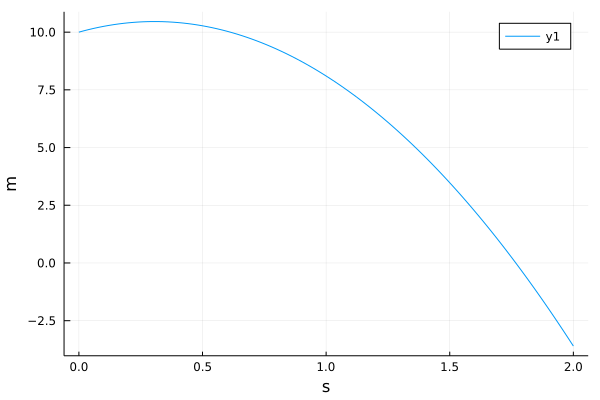

In [14]:
plot(t, t -> h(t, h0, v0))

### Traçando o gráfico com os vetores/iteradores de quantidades

* Aqui, usamos o próprio `t`, assim como o vetor `h.(t, h_0, v_0)` obtido através da função.

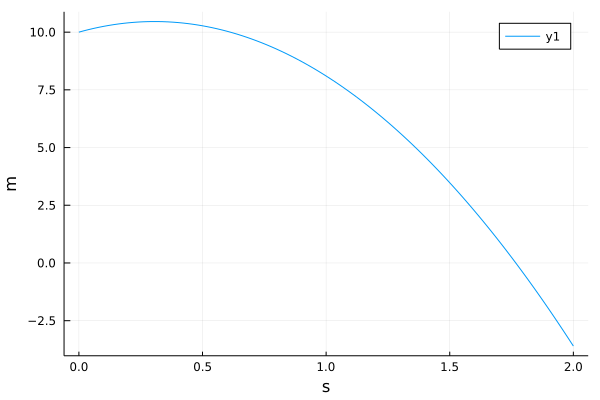

In [15]:
plot(t, h.(t, h0, v0))

### Embelezando o gráfico

* Observe, acima, que as unidades são automaticamente denotadas nos eixos, mas podemos fazer isso e acrescentar mais informações no compando `plot`.

* Novamente, observe que, mesmo qualificando os eixos, as unidades são automaticamente incluídas.

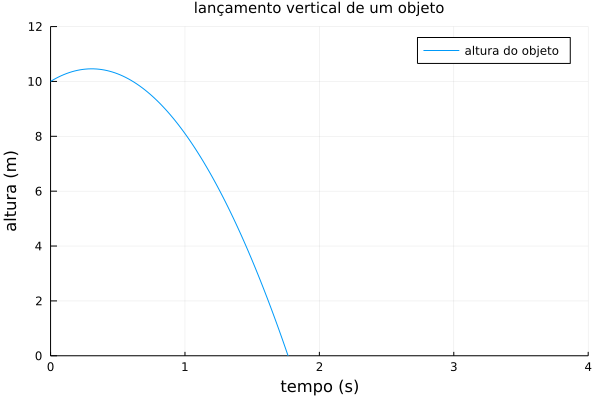

In [16]:
plot(t, h.(t, h0, v0), title="lançamento vertical de um objeto", titlefont=10,
    xlims = (0.0, 4.0), ylims=(0.0, 12.0), label = "altura do objeto", 
    xlabel = "tempo", ylabel="altura")

### Operações permitidas

* Podemos somar quantidades de mesma dimensão, independente das unidades.

* Podos multiplicar quantidades, unidades quaisquer, inclusive entre si.

* Podemos multiplicar dimensões entre si.

* Podemos converter uma quantidade entre unidades diferentes de mesma dimensão.

* Oberve que dimensões são em negrito e que negrito pode ser obtida com barra invertida, seguida de "bf" (de boldface), seguida da letra desejada e, finalmente, apertando ESC. Por exemplo, a dimensão de tempo **T** se obtém, em células de código, com `\bfT` + `ESC`

In [17]:
1u"km" + 100u"m" + 10u"ft" + 2u"inch"

2757747//2500 m

* Observe que como só usamos inteiros, a conversão resultou em um número racional.

* Para obtermos um ponto flutuante, podemos ter multiplicar as unidades pelos números correspondente em ponto flutuante (ou pelo menos um deles, pois a conversão dos outros será forçada automaticamente).

In [18]:
1.0u"km" + 13u"inch"

1000.3302 m

In [19]:
3.0u"m" * 2.0u"1/s"

6.0 m s⁻¹

In [20]:
3.0u"m" * u"m/s^2"

3.0 m² s⁻²

In [21]:
u"𝐋" * u"𝐓"

𝐋 𝐓

In [22]:
uconvert(u"hr", 4352.0u"s")

1.208888888888889 hr

### Operações proibidas

* Não podemos somar quantidades com unidades diferentes.

* Não podemos somar unidades entre si, nem dimensões entre si, muito menos entre elas.

* Não podemos multiplicar uma dimensão por uma quantidade ou unidade.

* Não podemos converter uma quantidade em uma unidade de outra dimensão.

In [23]:
1.0u"m" + 2.0u"s"

LoadError: DimensionError: 1.0 m and 2.0 s are not dimensionally compatible.

In [24]:
u"m" + u"m"

LoadError: MethodError: no method matching +(::Unitful.FreeUnits{(m,), 𝐋, nothing}, ::Unitful.FreeUnits{(m,), 𝐋, nothing})
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560

In [25]:
1u"m" * u"s" * u"𝐓"

LoadError: MethodError: no method matching *(::Quantity{Int64, 𝐋 𝐓, Unitful.FreeUnits{(m, s), 𝐋 𝐓, nothing}}, ::Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560
[0m  *(::Quantity, [91m::Gain[39m) at /Users/rrosa/.julia/packages/Unitful/0oqX5/src/logarithm.jl:222
[0m  *(::Quantity, [91m::Level[39m) at /Users/rrosa/.julia/packages/Unitful/0oqX5/src/logarithm.jl:211
[0m  ...

In [26]:
uconvert(u"g", 10u"m")

LoadError: DimensionError: g and m are not dimensionally compatible.

## Buckingham-Pi

* Podemos aproveitar a estrutura do pacote `Unitful.jl` e explorar a capacidade de metaprogramação do Julia para montar um pacote que resolva os grupos adimensionais garantidos pelo Teorema de Buckingham-Pi.

* Isso foi feito no pacote [rmsrosa/UnitfulBuckinghamPi.jl](https://github.com/rmsrosa/UnitfulBuckinghamPi.jl).

* Tudo o que precisamos fazer é registrar as quantidades, unidades, dimensões como *parâmetros* do pacote, através das macros `@setparameters` e `@addparameters`.

* Em seguida, encontramos os grupos adimensionais com a função `pi_groups()`.

* Esse pacote foi inspirado no pacote em python desenvolvido [Ian Rose](https://ian-r-rose.github.io/pages/about.html) e descrito em [Automated dimensional analysis](https://ian-r-rose.github.io/automated-dimensional-analysis.html).

### Resolvendo o período do pêndulo via UnitfulBuckinghamPi.jl

* Primeiramente, definimos os parâmetros.

* Em seguida, os registramos no pacote.

* Finalmente, obtemos os grupos adimensionais.

In [27]:
# parâmetros
ℓ = 2u"m" # quantidade
g = 9.8u"m/s^2" # quantidade
m = u"g" # unidade
T = u"𝐓" # dimensão
θ = u"NoDims" # "dimensão" adimensional
nothing

In [28]:
# registro
@setparameters ℓ g m T θ

┌ Info: Parameter(s) registered:
└ @ UnitfulBuckinghamPi /Users/rrosa/.julia/packages/UnitfulBuckinghamPi/OeIXt/src/UnitfulBuckinghamPi.jl:127
┌ Info:  ℓ = 2 m
└ @ UnitfulBuckinghamPi /Users/rrosa/.julia/packages/UnitfulBuckinghamPi/OeIXt/src/UnitfulBuckinghamPi.jl:129
┌ Info:  g = 9.8 m s⁻²
└ @ UnitfulBuckinghamPi /Users/rrosa/.julia/packages/UnitfulBuckinghamPi/OeIXt/src/UnitfulBuckinghamPi.jl:129
┌ Info:  m = g
└ @ UnitfulBuckinghamPi /Users/rrosa/.julia/packages/UnitfulBuckinghamPi/OeIXt/src/UnitfulBuckinghamPi.jl:129
┌ Info:  T = 𝐓
└ @ UnitfulBuckinghamPi /Users/rrosa/.julia/packages/UnitfulBuckinghamPi/OeIXt/src/UnitfulBuckinghamPi.jl:129
┌ Info:  θ = NoDims
└ @ UnitfulBuckinghamPi /Users/rrosa/.julia/packages/UnitfulBuckinghamPi/OeIXt/src/UnitfulBuckinghamPi.jl:129


In [29]:
# grupos adimensionais na forma de string
pi_groups(:String)

2-element Vector{String}:
 "g^(1//2)*ℓ^(-1//2)*T^(1//1)"
 "θ^(1//1)"

In [30]:
# grupos adimensionais na forma de expressão do Julia
Π = pi_groups(:Expr)

2-element Vector{Expr}:
 :(g ^ (1 // 2) * ℓ ^ (-1 // 2) * T ^ (1 // 1))
 :(θ ^ (1 // 1))

* Como $T$ é uma dimensão e os outros parâmetros em $\Pi[1]$ são quantidades, não podemos "avaliar" ("evaluate") $\Pi[1]$, pois não podemos multipicar uma dimensão por uma unidade ou quantidade. 

* Mas como $\Pi[2]$ não envolve tal multiplicação, então nesse caso não temos problema.

In [31]:
eval(Π[2])

NoDims

In [32]:
eval(Π[1])

LoadError: MethodError: no method matching *(::Quantity{Float64, 𝐓⁻¹, Unitful.FreeUnits{(s⁻¹,), 𝐓⁻¹, nothing}}, ::Unitful.Dimensions{(Unitful.Dimension{:Time}(1//1),)})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560
[0m  *(::Quantity, [91m::Gain[39m) at /Users/rrosa/.julia/packages/Unitful/0oqX5/src/logarithm.jl:222
[0m  *(::Quantity, [91m::Level[39m) at /Users/rrosa/.julia/packages/Unitful/0oqX5/src/logarithm.jl:211
[0m  ...

* Para resolver esse problema com $\Pi[1]$, podemos substituir a dimensão `T=u"𝐓"` por uma unidade, que denotamos por $\tau$.

In [33]:
τ = u"s"

s

In [34]:
@setparameters ℓ g m τ θ

┌ Info: Parameter(s) registered:
└ @ UnitfulBuckinghamPi /Users/rrosa/.julia/packages/UnitfulBuckinghamPi/OeIXt/src/UnitfulBuckinghamPi.jl:127
┌ Info:  ℓ = 2 m
└ @ UnitfulBuckinghamPi /Users/rrosa/.julia/packages/UnitfulBuckinghamPi/OeIXt/src/UnitfulBuckinghamPi.jl:129
┌ Info:  g = 9.8 m s⁻²
└ @ UnitfulBuckinghamPi /Users/rrosa/.julia/packages/UnitfulBuckinghamPi/OeIXt/src/UnitfulBuckinghamPi.jl:129
┌ Info:  m = g
└ @ UnitfulBuckinghamPi /Users/rrosa/.julia/packages/UnitfulBuckinghamPi/OeIXt/src/UnitfulBuckinghamPi.jl:129
┌ Info:  τ = s
└ @ UnitfulBuckinghamPi /Users/rrosa/.julia/packages/UnitfulBuckinghamPi/OeIXt/src/UnitfulBuckinghamPi.jl:129
┌ Info:  θ = NoDims
└ @ UnitfulBuckinghamPi /Users/rrosa/.julia/packages/UnitfulBuckinghamPi/OeIXt/src/UnitfulBuckinghamPi.jl:129


In [35]:
Π = pi_groups()

2-element Vector{Expr}:
 :(g ^ (1 // 2) * ℓ ^ (-1 // 2) * τ ^ (1 // 1))
 :(θ ^ (1 // 1))

In [36]:
eval(Π[1])

2.2135943621178655

In [37]:
eval(Π[2])

NoDims

In [38]:
dimension(eval(Π[1]))

NoDims

## Exercícios

1. Considere a equação $\tau = 2\pi\sqrt{\ell/g}$ para o período de pêndulo:
    1. Defina a função $\tau(\ell, g) = 2\pi \sqrt{\ell/g}$ em julia.
    1. Defina um vetor $\ell$ com unidades de comprimento variando de $10\,\texttt{cm}$ a $2\,\texttt{m}$, espaçados de um centímetro.
    1. Defina a constante $g$ como uma quantidade dimensional apropriada.
    1. Obtenha os valores correspondentes de $\tau=\tau(\ell,g)$.
    1. Trace o gráfico de $\tau$ no intervalo considerado de $\ell$.
1. Obtenha o grupo adimensional $T\ell/mv^2$ do exercício da caderno anterior através do pacote `UnitfulBuckinghamPi.jl`.

<!--NAVIGATOR-->

---
[<- 3.2. Análise dimensional e o Teorema de Buckingham-Pi](03.02-BuckinghamPi.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [4. Ajuste de parâmetros ->](04.00-Ajuste_parametros.ipynb)